# "Hot" Plasma Paper II Figures

In [60]:
#Import needed libraries
import sys
import os
from random import randint
from imp import reload
import numpy as np
from astroML import density_estimation
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.style.use('papers')
import seaborn.apionly as sns
sys.path.append(os.path.join(os.environ['RESEARCH_DIR'],'EBTEL_analysis/src/'))
import ebtel_dem as ebd
import ebtel_plot_em as ebpe
%matplotlib inline
reload(ebd)
reload(ebpe)

/opt/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'ebtel_plot_em' from '/home/wtb2/Documents/EBTEL_analysis/src/ebtel_plot_em.py'>

## Figure Inventory

* Figure 1: Tikz figure showing parameter space
* Figure 2: Sample heating functions: uniform, power-law, power-law + scaling
* Figure 3: $2\times3$ grid of EM distributions for $\alpha=-2.5$, electron heating; power-law, power-law + scaling, uniform and NEI counterparts all included in each panel for six sample heating rates.
* Figure 4: Same as Figure 3, but for ion heating
* (Optional Figure): Same as Figure 3, but for single-fluid case
* Figure 5: Sample $T,n$ profiles to show important of NEI in uniform versus power-law heating scenarios
* Figure 5+$\epsilon$: Overlaid $\mathrm{EM}$ curves for uniform, power-law, power-law + wait-time (multiple indices?) for a low heating frequency ($t_N\sim4000-500$ s) to show whether a power-law fit is appropriate; use limits $6.6<\log{T}<7.5$
* Figure 6: Distribution of Brosius EM ratio as a function of waiting time for electron heating
* Figure 7: Same as Figure 6, but for ion heating
* (Optional Figure): Same as Figure 6, but for single-fluid case

Build all the figures needed for "Hot" Plasma Paper II

Define some convenient paths before proceeding.

In [61]:
figs_root_ieq='/data/datadrive2/EBTEL_figs/%s_heating_runs/alpha%s'
figs_root_nei='/data/datadrive2/IonPopSolver_figs/%s_heating_runs/alpha%s'
save_file_ext = 'ebtel_L40.0_tpulse200.0_alpha%s_%s_heating'
paper_figs_save_root=os.path.join(os.environ['RESEARCH_DIR'],'papers/hot_non-flaring_plasma_2/figures/')
root_dir = os.path.split(figs_root_ieq.replace('EBTEL_figs','EBTEL_runs'))[0]
root_dir_nei = os.path.split(figs_root_nei.replace('IonPopSolver_figs','IonPopSolver_runs'))[0]
tn_ext = 'ebtel_L40.0_tn%d%s_tpulse200.0_rka4'

## Figure 2

First get three sample heating functions and plot them.

In [62]:
hf_uni = np.loadtxt(os.path.join(root_dir%'electron','alphauniform','data',tn_ext%(1000,''),tn_ext%(1000,'')+'_0.txt'))
hf_uni = [hf_uni[:,0],hf_uni[:,15]]
lf_uni = np.loadtxt(os.path.join(root_dir%'electron','alphauniform','data',tn_ext%(5000,''),tn_ext%(5000,'')+'_0.txt'))
lf_uni = [lf_uni[:,0],lf_uni[:,15]]
if_pl = np.loadtxt(os.path.join(root_dir%'electron','alpha1.5','data',tn_ext%(2000,'-b1.0'),tn_ext%(2000,'-b1.0')+'_0.txt'))
if_pl = [if_pl[:,0],if_pl[:,15]]
if_pl_ns = np.loadtxt(os.path.join(root_dir%'electron','alpha1.5','data',tn_ext%(2000,''),tn_ext%(2000,'')+'_0.txt'))
if_pl_ns = [if_pl_ns[:,0],if_pl_ns[:,15]]

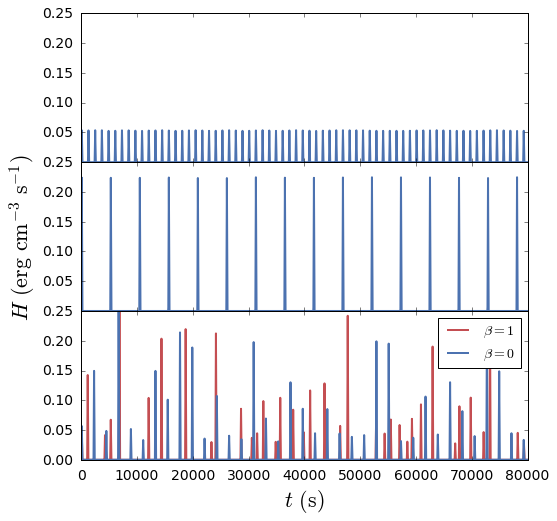

In [63]:
fig,axes = plt.subplots(3,1,figsize=(8,8),sharex=True)
plt.subplots_adjust(hspace=0)
#plot data
axes[0].plot(hf_uni[0],hf_uni[1],color=sns.color_palette('deep')[0])
axes[1].plot(lf_uni[0],lf_uni[1],color=sns.color_palette('deep')[0])
axes[2].plot(if_pl[0],if_pl[1],color=sns.color_palette('deep')[2],label=r'$\beta=1$')
axes[2].plot(if_pl_ns[0],if_pl_ns[1],color=sns.color_palette('deep')[0],label=r'$\beta=0$')
#axes limits
axes[0].set_ylim([0,.25])
axes[1].set_ylim([0,.25])
axes[2].set_ylim([0,.25])
#fix tick labels
nbins = len(axes[2].get_yticklabels())
axes[2].yaxis.set_major_locator(MaxNLocator(nbins=nbins))
nbins = len(axes[1].get_yticklabels())
axes[1].yaxis.set_major_locator(MaxNLocator(nbins=nbins,prune='lower'))
nbins = len(axes[0].get_yticklabels())
axes[0].yaxis.set_major_locator(MaxNLocator(nbins=nbins,prune='lower'))
#labels
axes[1].set_ylabel(r'$H$ $(\mathrm{erg}$ $\mathrm{cm}^{-3}$ $\mathrm{s}^{-1}\mathrm{)}$')
axes[2].set_xlabel(r'$t$ $\mathrm{(s)}$')
#legend
axes[2].legend(loc=1)
#save
plt.savefig(os.path.join(paper_figs_save_root,'heating_functions.pdf'),
           format='pdf',dpi=1000)

## Figure 3
$2\times3$ grid of emission measure ratios for a variety of heating scenarios; electron heating

In [64]:
files = [os.path.join(figs_root_ieq%('electron','2.5'),save_file_ext%('2.5','electron')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_ieq%('electron','2.5'),save_file_ext%('2.5-b1.0','electron')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_nei%('electron','2.5'),save_file_ext%('2.5','electron')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_nei%('electron','2.5'),save_file_ext%('2.5-b1.0','electron')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_ieq%('electron','uniform'),save_file_ext%('uniform','electron')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_nei%('electron','uniform'),save_file_ext%('uniform','electron')+'.lvl2_em_statistics.pickle')]
labels=[r'$\alpha=-2.5$, $\mathrm{IEQ}$',r'$\alpha=-2.5$, $\beta=1$, $\mathrm{IEQ}$',
        r'$\alpha=-2.5$, $\mathrm{NEI}$',r'$\alpha=-2.5$, $\beta=1$, $\mathrm{NEI}$',
       r'$\alpha=\mathrm{uniform}$, $\mathrm{IEQ}$',r'$\alpha=\mathrm{uniform}$, $\mathrm{NEI}$']
linestyles = 2*['solid'] + 2*['dashed'] + ['solid'] + ['dashed']
colors = []
colors.append(sns.color_palette('deep')[0])
colors.append(sns.color_palette('deep')[1])
colors.append(sns.color_palette('deep')[0])
colors.append(sns.color_palette('deep')[1])
colors.append(sns.color_palette('deep')[2])
colors.append(sns.color_palette('deep')[2])
show_leg = 2*[True] + 2*[False] + [True] + [False]
tw_select=np.array([250,750,1500,2500,3750,5000])

In [65]:
ebpe.make_top_em_grid(files=files,labels=labels,tw_select=tw_select,nrows=2,ncols=3,figsize=(16,8),
                      xlims=[10**5.5,10**7.5],ylims=[1.5e+25,2e+28],fontsize=22.,alfs=14./22.,
                     xlab_pos=[0.5,0.05],ylab_pos=[0.075,0.5],linestyles=linestyles,colors=colors,show_leg=show_leg,
                     print_fig_filename=os.path.join(paper_figs_save_root,'em_grid_electron_a25'),fformat='pdf')

## Figure 4
Same as above, but now for ion heating.

In [66]:
files = [os.path.join(figs_root_ieq%('ion','2.5'),save_file_ext%('2.5','ion')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_ieq%('ion','2.5'),save_file_ext%('2.5-b1.0','ion')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_nei%('ion','2.5'),save_file_ext%('2.5','ion')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_nei%('ion','2.5'),save_file_ext%('2.5-b1.0','ion')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_ieq%('ion','uniform'),save_file_ext%('uniform','ion')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_nei%('ion','uniform'),save_file_ext%('uniform','ion')+'.lvl2_em_statistics.pickle')]

In [67]:
ebpe.make_top_em_grid(files=files,labels=labels,tw_select=tw_select,nrows=2,ncols=3,figsize=(16,8),
                      xlims=[10**5.5,10**7.5],ylims=[1.5e+25,2e+28],fontsize=22.,alfs=14./22.,
                     xlab_pos=[0.5,0.05],ylab_pos=[0.075,0.5],linestyles=linestyles,colors=colors,show_leg=show_leg,
                     print_fig_filename=os.path.join(paper_figs_save_root,'em_grid_ion_a25'),fformat='pdf')

## Figure 5
Sample $T(t),n(t)$ profiles to show differences in density at onset of heating in uniform versus power-law heating functions.

In [68]:
tn_sample_val = 1500
tn_samples_ieq = {'uniform':{},'power_law':{},'power_law_scaling':{}}
tn_samples_nei = {'uniform':{},'power_law':{},'power_law_scaling':{}}
data_dir_ieq = os.path.join(root_dir%'electron','alpha2.5/data/',tn_ext)
data_dir_nei = os.path.join(root_dir_nei%'electron','alpha2.5/data/',tn_ext)
#pl
i = len([fn for fn in os.listdir(data_dir_ieq%(tn_sample_val,'')) if 'heat_amp' not in fn])
i_run = randint(0,i-1)
data = np.loadtxt(os.path.join(data_dir_ieq%(tn_sample_val,''),tn_ext%(tn_sample_val,'')+'_%d.txt'%i_run))
tn_samples_ieq['power_law']={'t':data[:,0],'T':data[:,1],'n':data[:,3],'q':data[:,15]}
data = np.loadtxt(os.path.join(data_dir_nei%(tn_sample_val,''),tn_ext%(tn_sample_val,'')+'_%d.ips_results.txt'%i_run))
tn_samples_nei['power_law']={'t':data[:,0],'T':data[:,1],'n':data[:,3],'q':data[:,15]}
#scaling
i = len([fn for fn in os.listdir(data_dir_ieq%(tn_sample_val,'-b1.0')) if 'heat_amp' not in fn])
i_run = randint(0,i-1)
data = np.loadtxt(os.path.join(data_dir_ieq%(tn_sample_val,'-b1.0'),tn_ext%(tn_sample_val,'-b1.0')+'_%d.txt'%i_run))
tn_samples_ieq['power_law_scaling']={'t':data[:,0],'T':data[:,1],'n':data[:,3],'q':data[:,15]}
data = np.loadtxt(os.path.join(data_dir_nei%(tn_sample_val,'-b1.0'),tn_ext%(tn_sample_val,'-b1.0')+'_%d.ips_results.txt'%i_run))
tn_samples_nei['power_law_scaling']={'t':data[:,0],'T':data[:,1],'n':data[:,3],'q':data[:,15]}
#uniform
data_dir = os.path.join(root_dir%'electron','alphauniform/data/',tn_ext)
data = np.loadtxt(os.path.join(data_dir%(tn_sample_val,''),tn_ext%(tn_sample_val,'')+'_0.txt'))
tn_samples_ieq['uniform'] = {'t':data[:,0],'T':data[:,1],'n':data[:,3],'q':data[:,15]}
data_dir = os.path.join(root_dir_nei%'electron','alphauniform/data/',tn_ext)
data = np.loadtxt(os.path.join(data_dir%(tn_sample_val,''),tn_ext%(tn_sample_val,'')+'_0.ips_results.txt'))
tn_samples_nei['uniform'] = {'t':data[:,0],'T':data[:,1],'n':data[:,3],'q':data[:,15]}

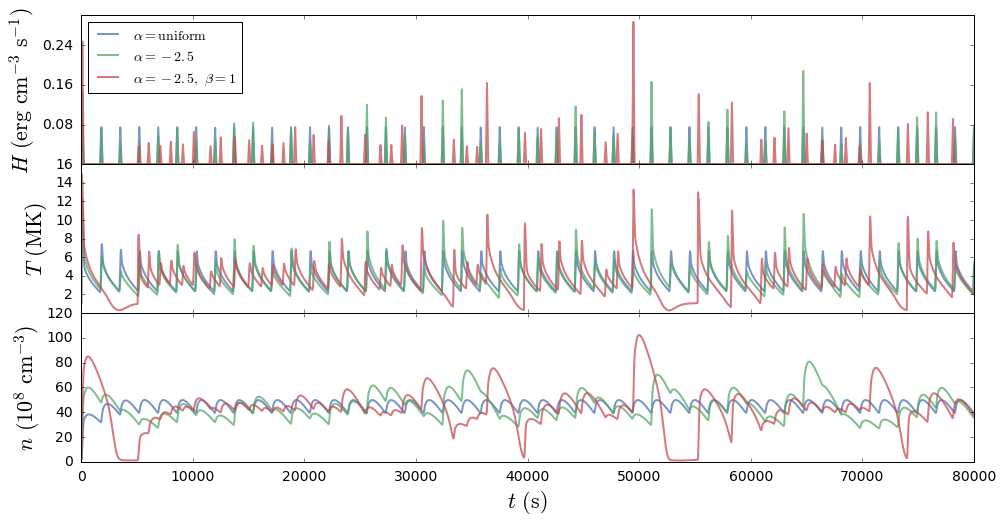

In [69]:
fig,axes = plt.subplots(3,1,figsize=(16,8),sharex=True)
types = ['uniform','power_law','power_law_scaling']
labels = [r'$\alpha=\mathrm{uniform}$',r'$\alpha=-2.5$',r'$\alpha=-2.5,\,\,\beta=1$']
for t,l,i in zip(types,labels,range(len(types))):
    #heating
    axes[0].plot(tn_samples_ieq[t]['t'],tn_samples_ieq[t]['q'],color=sns.color_palette('deep')[i],label=l,alpha=0.75)
    #axes[0].plot(tn_samples_nei[t]['t'],tn_samples_nei[t]['q'],color=sns.color_palette('deep')[i],linestyle='--')
    #temperature
    axes[1].plot(tn_samples_ieq[t]['t'],tn_samples_ieq[t]['T']/1e+6,color=sns.color_palette('deep')[i],alpha=0.75)
    #axes[1].plot(tn_samples_nei[t]['t'],tn_samples_nei[t]['T']/1e+6,color=sns.color_palette('deep')[i],linestyle='--',alpha=0.75)
    #density
    axes[2].plot(tn_samples_ieq[t]['t'],tn_samples_ieq[t]['n']/1e+8,color=sns.color_palette('deep')[i],alpha=0.75)
    #axes[2].plot(tn_samples_nei[t]['t'],tn_samples_nei[t]['n']/1e+8,color=sns.color_palette('deep')[i],linestyle='--',alpha=0.75)
axes[2].set_xlabel(r'$t$ $(\mathrm{s})$')
axes[0].set_ylabel(r'$H$ $(\mathrm{erg}$ $\mathrm{cm}^{-3}$ $\mathrm{s}^{-1})$')
axes[1].set_ylabel(r'$T$ $(\mathrm{MK})$')
axes[2].set_ylabel(r'$n$ $(10^8\,\,\mathrm{cm}^{-3})$')
axes[0].set_xlim([0,8e4])
axes[1].set_xlim([0,8e4])
axes[2].set_xlim([0,8e4])
nbins = 4#len(axes[0].get_yticklabels())
axes[0].yaxis.set_major_locator(MaxNLocator(nbins=nbins,prune='lower'))
nbins = len(axes[1].get_yticklabels())
axes[1].yaxis.set_major_locator(MaxNLocator(nbins=nbins,prune='lower'))
nbins = len(axes[2].get_yticklabels())
axes[2].yaxis.set_major_locator(MaxNLocator(nbins=nbins))
axes[0].legend(loc='best')
plt.subplots_adjust(hspace=0)
plt.savefig(os.path.join(paper_figs_save_root,'nT_sample_curves_tn%d_electron.pdf'%(tn_sample_val)),format='pdf',dpi=1000)

## Figure 6
Distribution of Brosius EM ratios as a function of wait-time (and heating function type) for electron heating, ionization equilibrium. Probably only need to deal with ionization equilibrium here because we showed in the last (two) sections that NEI is really only important for uniform heating. 

In [70]:
#Decide which temperature ratio we want to use here
ratio_index=0

In [71]:
#make file and label list
files,labels=[],[]
species='electron'
tmp = os.path.join(figs_root_ieq,save_file_ext+'.lvl2_diagnostics.pickle')
files.append(tmp%(species,'1.5','1.5',species))
files.append(tmp%(species,'1.5','1.5-b1.0',species))
files.append(tmp%(species,'2.0','2.0',species))
files.append(tmp%(species,'2.0','2.0-b1.0',species))
files.append(tmp%(species,'2.5','2.5',species))
files.append(tmp%(species,'2.5','2.5-b1.0',species))
files.append(tmp%(species,'uniform','uniform',species))
labels=[r'$\alpha=-1.5$',r'$\alpha=-1.5$, $\beta=1$',
        r'$\alpha=-2.0$',r'$\alpha=-2.0$, $\beta=1$',
        r'$\alpha=-2.5$',r'$\alpha=-2.5$, $\beta=1$',
        r'$\alpha=\mathrm{uniform}$']

First, bin by the type of heating function.

In [72]:
colors = []
for i in range(int((len(labels)-1)/2)):
    colors.append(sns.color_palette('deep')[i])
    colors.append(sns.color_palette('deep')[i])
colors.append(sns.color_palette('deep')[i+1])
styles = int((len(labels)-1)/2)*['solid','dashed'] + ['solid']
histo_opts = {}
for i in range(len(labels)):
    histo_opts[labels[i]] = {'color':colors[i],'label':labels[i],'linestyle':styles[i],'linewidth':3,
                                         'normed':True,'stacked':True}

In [73]:
histmaker_alpha = ebpe.EMHistoBuilder(files,labels,fformat='pdf',fontsize=22.,alfs=14./22.)
histmaker_alpha.load_diagnostics(ratio_index=ratio_index)
histmaker_alpha.make_fit_histogram('ratio',histo_opts=histo_opts,leg=True,x_limits=[0,0.6],bin_tool='knuth',
                                  print_fig_filename=os.path.join(paper_figs_save_root,'ratio_hist_alpha_%s_T%d'%(species,ratio_index)))

Optimization terminated successfully.
         Current function value: -1658.524986
         Iterations: 17
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -6215.539580
         Iterations: 17
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: -3244.485046
         Iterations: 16
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -11014.822327
         Iterations: 23
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -2414.246901
         Iterations: 20
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 1.402043
         Iterations: 13
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -23479.166053
         Iterations: 27
         Function evaluations: 68


Then, bin by the waiting time.

In [74]:
t_wait = np.arange(250,5250,250)
styles = ['dotted','dashdot','dashed','solid']
interval = 3
colors = []
[colors.extend(len(styles)*[sns.color_palette('deep')[i]]) for i in range(int(len(t_wait)/len(styles)))] 
styles = int(len(t_wait)/len(styles))*styles
leg_labels = [r'$%d$ s'%tw for tw in t_wait]
histo_opts = {}
for i in np.arange(0+interval,len(t_wait)+interval,1+interval):
    histo_opts[str(i)] = {'color':colors[i],'label':leg_labels[i],'linestyle':styles[i],'linewidth':3,
                                         'normed':True,'stacked':True}

In [75]:
histmaker_twait = ebpe.EMHistoBuilder(files,labels,group='by_t_wait',fontsize=22.,alfs=14./22.,fformat='pdf')
histmaker_twait.load_diagnostics(ratio_index=ratio_index,t_wait_interval=interval)
histmaker_twait.make_fit_histogram('ratio',histo_opts=histo_opts,leg=True,x_limits=[0,0.6],bin_tool='knuth',
                                  print_fig_filename=os.path.join(paper_figs_save_root,'ratio_hist_twait_%s_T%d'%(species,ratio_index)))

Optimization terminated successfully.
         Current function value: -610.306612
         Iterations: 15
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: -5111.027867
         Iterations: 19
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -1774.194697
         Iterations: 26
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: -2004.320545
         Iterations: 17
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -1332.503297
         Iterations: 17
         Function evaluations: 48


## Figure 7
Same as Figure 6, but for ion heating.

In [76]:
#make file and label list
files,labels=[],[]
species='ion'
tmp = os.path.join(figs_root_ieq,save_file_ext+'.lvl2_diagnostics.pickle')
files.append(tmp%(species,'1.5','1.5',species))
files.append(tmp%(species,'1.5','1.5-b1.0',species))
files.append(tmp%(species,'2.0','2.0',species))
files.append(tmp%(species,'2.0','2.0-b1.0',species))
files.append(tmp%(species,'2.5','2.5',species))
files.append(tmp%(species,'2.5','2.5-b1.0',species))
files.append(tmp%(species,'uniform','uniform',species))
labels=[r'$\alpha=-1.5$',r'$\alpha=-1.5$, $\beta=1$',
        r'$\alpha=-2.0$',r'$\alpha=-2.0$, $\beta=1$',
        r'$\alpha=-2.5$',r'$\alpha=-2.5$, $\beta=1$',
        r'$\alpha=\mathrm{uniform}$, $\mathrm{IEQ}$']

First, bin by type of heating function.

In [77]:
colors = []
for i in range(int((len(labels)-1)/2)):
    colors.append(sns.color_palette('deep')[i])
    colors.append(sns.color_palette('deep')[i])
colors.append(sns.color_palette('deep')[i+1])
styles = int((len(labels)-1)/2)*['solid','dashed'] + ['solid']
histo_opts = {}
for i in range(len(labels)):
    histo_opts[labels[i]] = {'color':colors[i],'label':labels[i],'linestyle':styles[i],'linewidth':3,
                                         'normed':True,'stacked':True}

In [78]:
histmaker_alpha = ebpe.EMHistoBuilder(files,labels,fformat='pdf',fontsize=22.,alfs=14./22.)
histmaker_alpha.load_diagnostics(ratio_index=ratio_index)
histmaker_alpha.make_fit_histogram('ratio',histo_opts=histo_opts,leg=True,x_limits=[0,0.6],bin_tool='knuth',
                                 print_fig_filename=os.path.join(paper_figs_save_root,'ratio_hist_alpha_%s_T%d'%(species,ratio_index)))

Optimization terminated successfully.
         Current function value: -3279.930600
         Iterations: 19
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: -3154.914895
         Iterations: 16
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -3160.107389
         Iterations: 16
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -3461.585916
         Iterations: 16
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -3238.072023
         Iterations: 16
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -2933.599703
         Iterations: 18
         Function evaluations: 49


In [79]:
t_wait = np.arange(250,5250,250)
styles = ['dotted','dashdot','dashed','solid']
interval = 3
colors = []
[colors.extend(len(styles)*[sns.color_palette('deep')[i]]) for i in range(int(len(t_wait)/len(styles)))] 
styles = int(len(t_wait)/len(styles))*styles
leg_labels = [r'$%d$ s'%tw for tw in t_wait]
histo_opts = {}
for i in np.arange(0+interval,len(t_wait)+interval,1+interval):
    histo_opts[str(i)] = {'color':colors[i],'label':leg_labels[i],'linestyle':styles[i],'linewidth':3,
                                         'normed':True,'stacked':True}

In [80]:
histmaker_twait = ebpe.EMHistoBuilder(files,labels,group='by_t_wait',fontsize=22.,alfs=14./22.,fformat='pdf')
histmaker_twait.load_diagnostics(ratio_index=ratio_index,t_wait_interval=interval)
histmaker_twait.make_fit_histogram('ratio',histo_opts=histo_opts,leg=True,x_limits=[0,0.6],bin_tool='knuth',
                                  print_fig_filename=os.path.join(paper_figs_save_root,'ratio_hist_twait_%s_T%d'%(species,ratio_index)))

Optimization terminated successfully.
         Current function value: -1575.805398
         Iterations: 16
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: -1827.755245
         Iterations: 21
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -1538.161043
         Iterations: 16
         Function evaluations: 46
